<a href="https://colab.research.google.com/github/islet0/Data-analytics/blob/main/Food%20prices%20in%20india.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries installed

In [152]:
!pip install pandas numpy sklearn.preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The data has been imported

In [153]:
df = pd.read_csv("/content/food_prices_ind.csv")
df

<ipython-input-153-1b1aad100888>:1: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/food_prices_ind.csv")


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.0,0.255
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4303
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.988
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168491,2024-01-15,Rajasthan,Jaipur,North Zone,26.938848,75.800056,oil and fats,Oil (soybean),KG,actual,Retail,INR,128.47,1.5502
168492,2024-01-15,Rajasthan,Jaipur,North Zone,26.938848,75.800056,oil and fats,Oil (sunflower),KG,actual,Retail,INR,152.13,1.8357
168493,2024-01-15,Rajasthan,Jaipur,North Zone,26.938848,75.800056,pulses and nuts,Lentils,KG,actual,Retail,INR,147.53,1.7802
168494,2024-01-15,Rajasthan,Jaipur,North Zone,26.938848,75.800056,pulses and nuts,Lentils (moong),KG,actual,Retail,INR,112.64,1.3592


Checking data types and missing values



In [154]:
df_dtypes = pd.DataFrame({'Null': df.isnull().sum(),'Dtype': df.dtypes})
df_dtypes

,Null,Dtype
date,0,object
admin1,629,object
admin2,629,object
market,0,object
latitude,629,object
longitude,629,object
category,0,object
commodity,0,object
unit,0,object
priceflag,0,object


Duplicates are removed

In [155]:
df.drop_duplicates()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.0,0.255
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4303
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.988
4,1994-01-15,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168491,2024-01-15,Rajasthan,Jaipur,North Zone,26.938848,75.800056,oil and fats,Oil (soybean),KG,actual,Retail,INR,128.47,1.5502
168492,2024-01-15,Rajasthan,Jaipur,North Zone,26.938848,75.800056,oil and fats,Oil (sunflower),KG,actual,Retail,INR,152.13,1.8357
168493,2024-01-15,Rajasthan,Jaipur,North Zone,26.938848,75.800056,pulses and nuts,Lentils,KG,actual,Retail,INR,147.53,1.7802
168494,2024-01-15,Rajasthan,Jaipur,North Zone,26.938848,75.800056,pulses and nuts,Lentils (moong),KG,actual,Retail,INR,112.64,1.3592


Filled in the unknown gaps in the data."

In [156]:
df['admin2'].fillna("Unknown", inplace=True)

df['commodity'].fillna(df['commodity'].mode()[0], inplace=True)
df['unit'].fillna(df[df['commodity'] == df['commodity'].mode()[0]]['unit'].mode()[0], inplace=True)
df['currency'].fillna(df['currency'].mode()[0], inplace=True)


<ipython-input-156-d01c3cf8aaba>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admin2'].fillna("Unknown", inplace=True)
<ipython-input-156-d01c3cf8aaba>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Unimportant columns and rows have been removed

In [157]:
df.drop('admin1', axis=1, inplace=True)
df.drop('market', axis=1, inplace=True)
df.drop('longitude', axis=1, inplace=True)
df.drop('latitude', axis=1, inplace=True)
df.drop('priceflag',axis=1, inplace=True)
df = df.drop(index=0)

In [158]:
df

,date,admin2,category,commodity,unit,pricetype,currency,price,usdprice
1,1994-01-15,Delhi,cereals and tubers,Rice,KG,Retail,INR,8.0,0.255
2,1994-01-15,Delhi,miscellaneous food,Sugar,KG,Retail,INR,13.5,0.4303
3,1994-01-15,Delhi,oil and fats,Oil (mustard),KG,Retail,INR,31.0,0.988
4,1994-01-15,Ahmadabad,cereals and tubers,Rice,KG,Retail,INR,6.8,0.2167
5,1994-01-15,Ahmadabad,cereals and tubers,Wheat,KG,Retail,INR,6.2,0.1976
...,...,...,...,...,...,...,...,...,...
168491,2024-01-15,Jaipur,oil and fats,Oil (soybean),KG,Retail,INR,128.47,1.5502
168492,2024-01-15,Jaipur,oil and fats,Oil (sunflower),KG,Retail,INR,152.13,1.8357
168493,2024-01-15,Jaipur,pulses and nuts,Lentils,KG,Retail,INR,147.53,1.7802
168494,2024-01-15,Jaipur,pulses and nuts,Lentils (moong),KG,Retail,INR,112.64,1.3592


In [159]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['usdprice'] = pd.to_numeric(df['usdprice'], errors='coerce')
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [160]:
city_commodity_stats = df.groupby(['admin2', 'commodity']).agg(
total_quantity=('price', 'count'), avg_price_usd=('usdprice', 'mean')).reset_index()


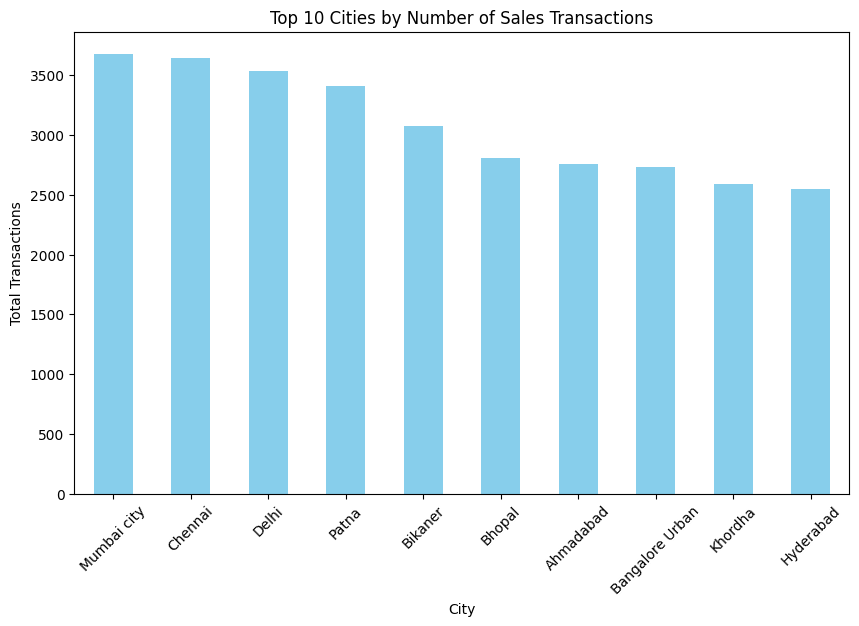

In [161]:
top_cities = df['admin2'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities by Number of Sales Transactions')
plt.xlabel('City')
plt.ylabel('Total Transactions')
plt.xticks(rotation=45)
plt.show()

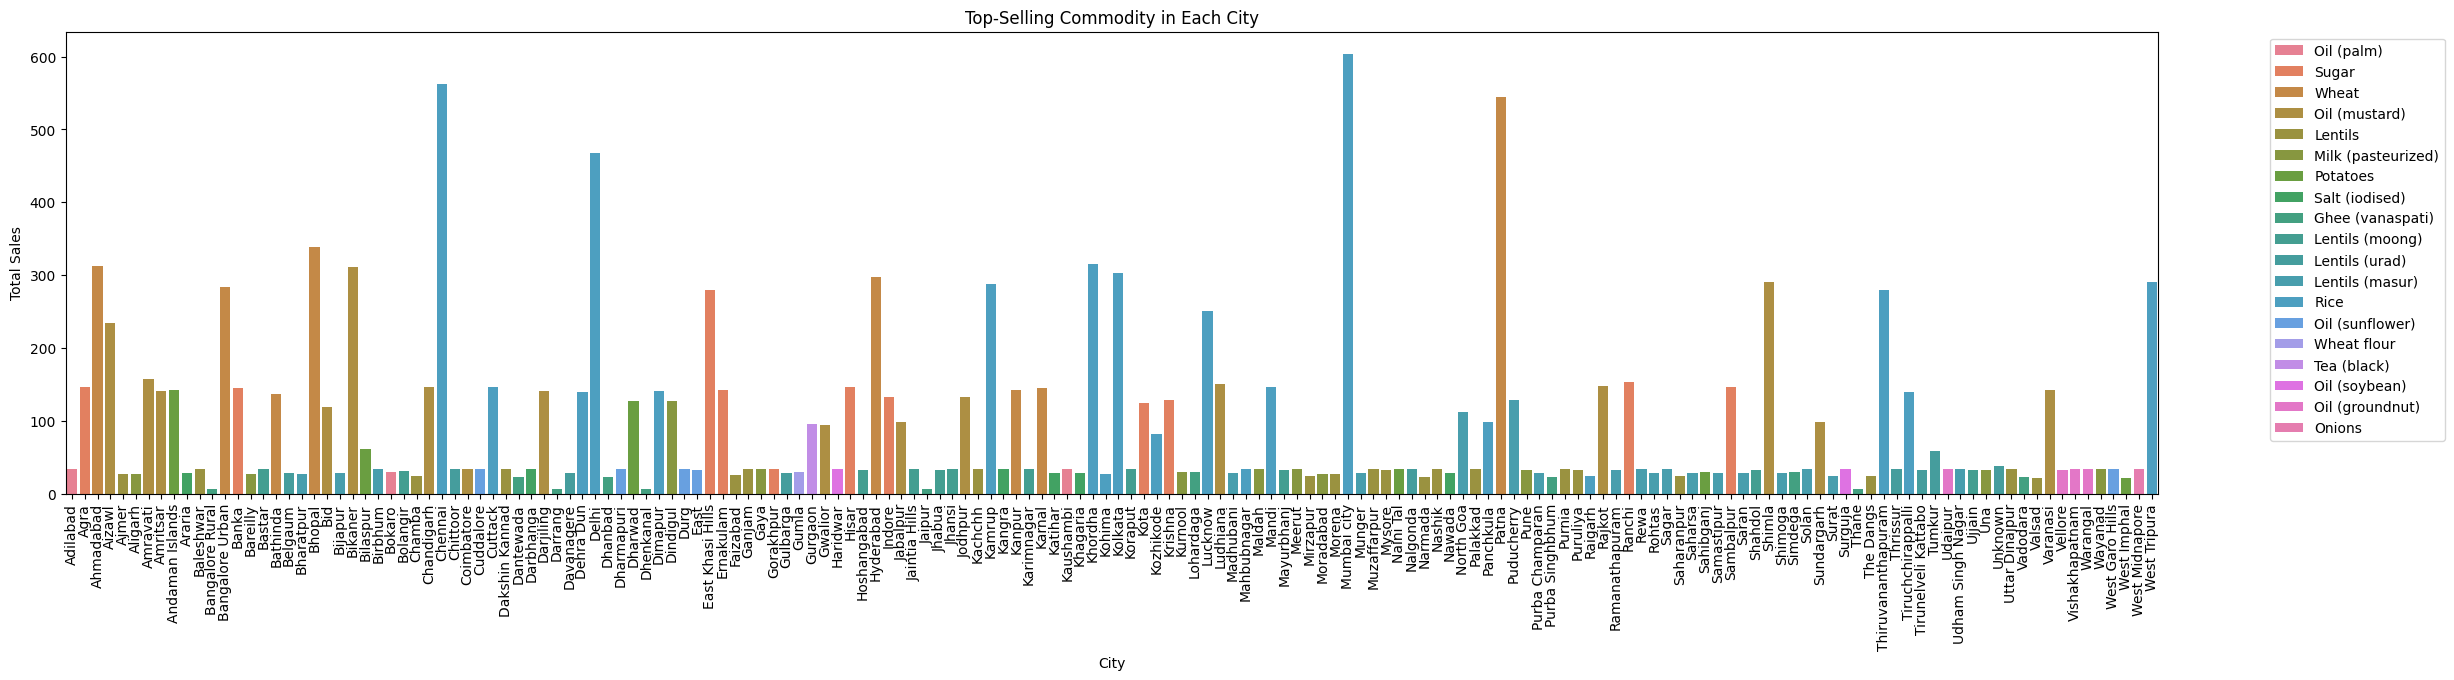

In [162]:
top_commodities = city_commodity_stats.loc[city_commodity_stats.groupby('admin2')['total_quantity'].idxmax()]

plt.figure(figsize=(27, 6))
sns.barplot(data=top_commodities, x='admin2', y='total_quantity', hue='commodity')
plt.title('Top-Selling Commodity in Each City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [163]:
# plt.figure(figsize=(15, 10))
# sns.boxplot(data=df, x='commodity', y='usdprice')
# plt.title('Price Distribution Across Commodities')
# plt.xlabel('Commodity')
# plt.ylabel('Price (USD)')
# plt.xticks(rotation=90)
# plt.show()

In [164]:
df['admin2'].value_counts()

,count
admin2,
Mumbai city,3677
Chennai,3644
Delhi,3531
Patna,3406
Bikaner,3070
...,...
Dhenkanal,116
Bangalore Rural,115
Darrang,114


In [165]:
df['commodity'].value_counts()

,count
commodity,
Rice,12337
Sugar,11390
Oil (mustard),10595
Wheat,10376
Potatoes,8682
Onions,8418
Wheat flour,8343
Salt (iodised),7967
Milk (pasteurized),7898


Top 10 Commodities Sold in Top 10 Cities

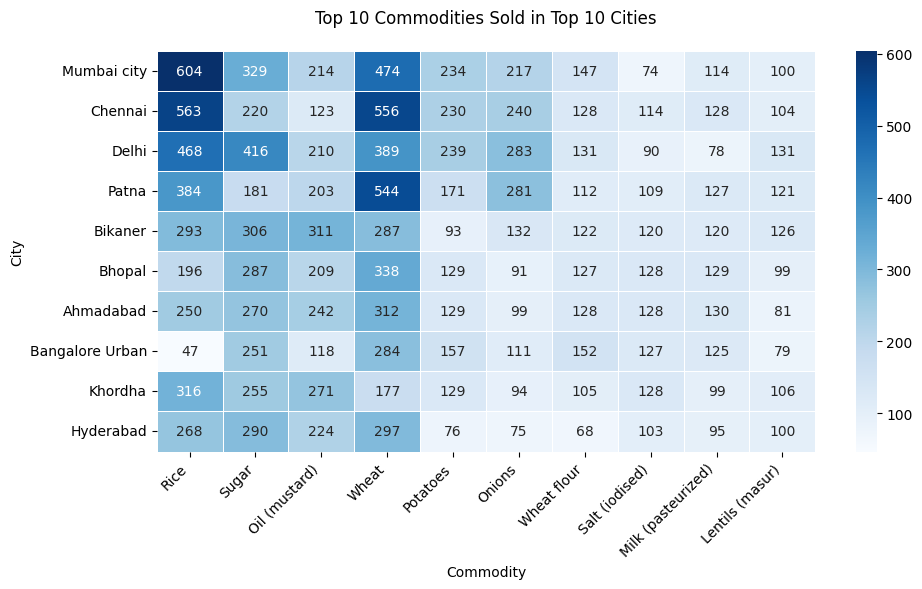

In [166]:
top_cities = df['admin2'].value_counts().nlargest(10).index
top_commodities = df['commodity'].value_counts().nlargest(10).index

filtered_pivot = pivot_table.loc[top_cities, top_commodities]

plt.figure(figsize=(10, 6))
sns.heatmap(filtered_pivot, cmap='Blues', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Top 10 Commodities Sold in Top 10 Cities', pad=20)
plt.xlabel('Commodity')
plt.ylabel('City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()